In [1]:
pip install opencv-python

Note: you may need to restart the kernel to use updated packages.


In [1]:
import re
import cv2 
import numpy as np
import pytesseract
from pytesseract import Output
from matplotlib import pyplot as plt

In [2]:
IMG_DIR = 'C:/Users/Gauri/3) PROJECTS/Image to Text/'

# for better accuracy:

# Further preprocessing of images using OpenCV

In [3]:
# get grayscale image
def get_grayscale(image):
    return cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# noise removal
def remove_noise(image):
    return cv2.medianBlur(image,5)
 
#thresholding
def thresholding(image):
    return cv2.threshold(image, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)[1]

#dilation
def dilate(image):
    kernel = np.ones((5,5),np.uint8)
    return cv2.dilate(image, kernel, iterations = 1)
    
#erosion
def erode(image):
    kernel = np.ones((5,5),np.uint8)
    return cv2.erode(image, kernel, iterations = 1)

#opening - erosion followed by dilation
def opening(image):
    kernel = np.ones((5,5),np.uint8)
    return cv2.morphologyEx(image, cv2.MORPH_OPEN, kernel)

#canny edge detection
def canny(image):
    return cv2.Canny(image, 100, 200)

#skew correction
def deskew(image):
    coords = np.column_stack(np.where(image > 0))
    angle = cv2.minAreaRect(coords)[-1]
    if angle < -45:
        angle = -(90 + angle)
    else:
        angle = -angle
    (h, w) = image.shape[:2]
    center = (w // 2, h // 2)
    M = cv2.getRotationMatrix2D(center, angle, 1.0)
    rotated = cv2.warpAffine(image, M, (w, h), flags=cv2.INTER_CUBIC, borderMode=cv2.BORDER_REPLICATE)
    return rotated

#template matching
def match_template(image, template):
    return cv2.matchTemplate(image, template, cv2.TM_CCOEFF_NORMED)

# Preprocessing and converting test4.jpg

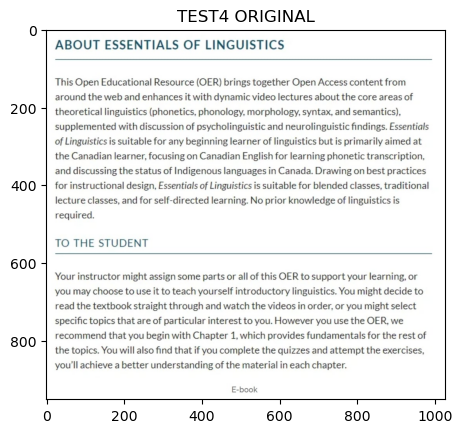

In [4]:
# Plot original image
image = cv2.imread(IMG_DIR + 'test4.jpg')
b,g,r = cv2.split(image)
rgb_img = cv2.merge([r,g,b])
plt.imshow(rgb_img)
plt.title('TEST4 ORIGINAL')
plt.show()

In [5]:
# Preprocessing image 
gray = get_grayscale(image)
thresh = thresholding(gray)
opening = opening(gray)
canny = canny(gray)
images = {'gray': gray, 
          'thresh': thresh, 
          'opening': opening, 
          'canny': canny}

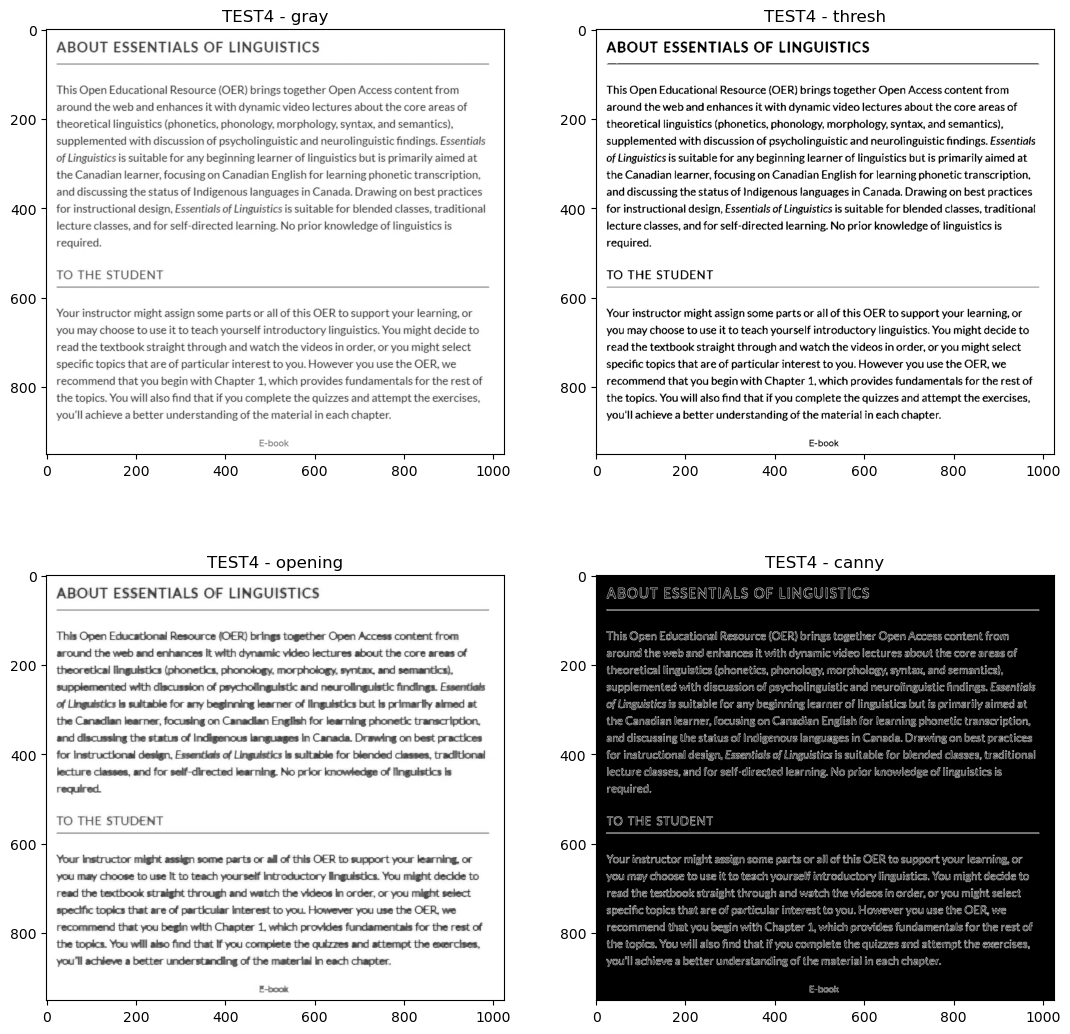

In [6]:
# Plot images after preprocessing
fig = plt.figure(figsize=(13,13))
ax = []

rows = 2
columns = 2
keys = list(images.keys())
for i in range(rows*columns):
    ax.append( fig.add_subplot(rows, columns, i+1) )
    ax[-1].set_title('TEST4 - ' + keys[i]) 
    plt.imshow(images[keys[i]], cmap='gray')    

In [7]:
# OCR output using Pytesseract
custom_config = r'--oem 3 --psm 6'
print('-----------------------------------------')
print('TESSERACT OUTPUT --> ORIGINAL IMAGE')
print('-----------------------------------------')
print(pytesseract.image_to_string(image, config=custom_config))
print('\n-----------------------------------------')
print('TESSERACT OUTPUT --> THRESHOLDED IMAGE')
print('-----------------------------------------')
print(pytesseract.image_to_string(image, config=custom_config))
print('\n-----------------------------------------')
print('TESSERACT OUTPUT --> OPENED IMAGE')
print('-----------------------------------------')
print(pytesseract.image_to_string(image, config=custom_config))
print('\n-----------------------------------------')
print('TESSERACT OUTPUT --> CANNY EDGE IMAGE')
print('-----------------------------------------')
print(pytesseract.image_to_string(image, config=custom_config))

-----------------------------------------
TESSERACT OUTPUT --> ORIGINAL IMAGE
-----------------------------------------
ABOUT ESSENTIALS OF LINGUISTICS
This Open Educational Resource (OER) brings together Open Access content from
around the web and enhances it with dynamic video lectures about the core areas of
theoretical linguistics (phonetics. phonology, morphology, syntax, and semantics),
supplemented with discussion of psycholinguistic and neurolinguistic ﬁndings. Essentials
of Linguistics is suitable for any beginning learner of linguistics but is primarily aimed at
the Canadian learner, focusing on Canadian English for learning phonetic transcription,
and discussing the status of Indigenous languages in Canada. Drawing on best practices
for instructional design, Essentials of Linguistics is suitable for blended classes, traditional
lecture classes, and for self-directed learning. No prior knowledge of linguistics is
required.
TO THE STUDENT
Your instructor might assign some part

In [8]:
# Original tesseract output with english language sepcified
custom_config = r'-l eng --oem 3 --psm 6'
print(pytesseract.image_to_string(image, config=custom_config))


#tessdata - languages mentioned - eng.trainneddata 

ABOUT ESSENTIALS OF LINGUISTICS
This Open Educational Resource (OER) brings together Open Access content from
around the web and enhances it with dynamic video lectures about the core areas of
theoretical linguistics (phonetics. phonology, morphology, syntax, and semantics),
supplemented with discussion of psycholinguistic and neurolinguistic ﬁndings. Essentials
of Linguistics is suitable for any beginning learner of linguistics but is primarily aimed at
the Canadian learner, focusing on Canadian English for learning phonetic transcription,
and discussing the status of Indigenous languages in Canada. Drawing on best practices
for instructional design, Essentials of Linguistics is suitable for blended classes, traditional
lecture classes, and for self-directed learning. No prior knowledge of linguistics is
required.
TO THE STUDENT
Your instructor might assign some parts or all of this OER to support your learning, or
you may choose to use it to teach yourself introductory linguistics. Y

In [9]:
# Output with a whitelist of characters (here, we have used all the lowercase characters from a to z only)
custom_config = r'-c tessedit_char_whitelist=abcdefghijklmnopqrstuvwxyz --psm 6'
print(pytesseract.image_to_string(image, config=custom_config))

maout izsssumxts or tmcuisrics
ifhis open liducational kesource loliill brings together open access content from
around the web and enhances it with dynamic video lectures about the core areas of
theoretical linguistics iphoneticst phonologyi morphologyy syntax and semanticsly
supplemented with discussion of psycholinguistic and neurolinguistic findings fssentials
of linguistics is suitable for any beginning learner of linguistics but is primarily aimed at
the canadian learners focusing on canadian linglish for learning phonetic tra nscriptiont
and discussing the status of indigenous languages in canadai brawing on best practices
for instructional design essentials of linguistics is suitable for blended classesv traditional
lecture classes and for selfedirected learningt hlo prior knowledge of linguistics is
requiredi
to me sruocur
tour instructor might assign some parts or all of this om to support your learning or
you may choose to use it to teach yourself introductory linguistics vo

# Testing with test3.jpg

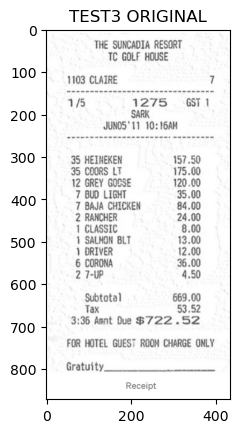

In [4]:
# Plot original image
image = cv2.imread(IMG_DIR + 'test3.jpg')
b,g,r = cv2.split(image)
rgb_img = cv2.merge([r,g,b])
plt.imshow(rgb_img)
plt.title('TEST3 ORIGINAL')
plt.show()

In [5]:
# Preprocessing image 
gray = get_grayscale(image)
thresh = thresholding(gray)
opening = opening(gray)
canny = canny(gray)
images = {'gray': gray, 
          'thresh': thresh, 
          'opening': opening, 
          'canny': canny}

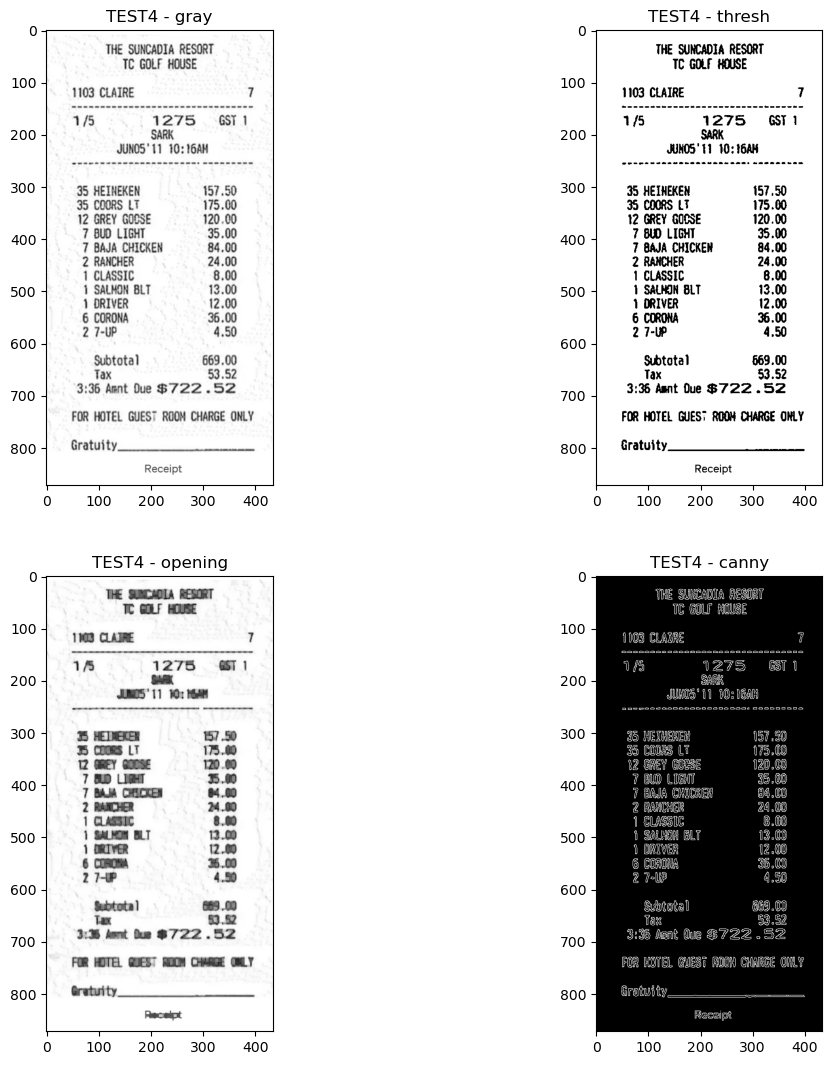

In [6]:
# Plot images after preprocessing
fig = plt.figure(figsize=(13,13))
ax = []

rows = 2
columns = 2
keys = list(images.keys())
for i in range(rows*columns):
    ax.append( fig.add_subplot(rows, columns, i+1) )
    ax[-1].set_title('TEST4 - ' + keys[i]) 
    plt.imshow(images[keys[i]], cmap='gray')    

In [7]:
# OCR output using Pytesseract
custom_config = r'-l eng --oem 3 --psm 6'
print('-----------------------------------------')
print('TESSERACT OUTPUT --> ORIGINAL IMAGE')
print('-----------------------------------------')
print(pytesseract.image_to_string(image, config=custom_config))
print('\n-----------------------------------------')
print('TESSERACT OUTPUT --> THRESHOLDED IMAGE')
print('-----------------------------------------')
print(pytesseract.image_to_string(image, config=custom_config))
print('\n-----------------------------------------')
print('TESSERACT OUTPUT --> OPENED IMAGE')
print('-----------------------------------------')
print(pytesseract.image_to_string(image, config=custom_config))
print('\n-----------------------------------------')
print('TESSERACT OUTPUT --> CANNY EDGE IMAGE')
print('-----------------------------------------')
print(pytesseract.image_to_string(image, config=custom_config))

-----------------------------------------
TESSERACT OUTPUT --> ORIGINAL IMAGE
-----------------------------------------
IHE SUNCADIA RESORT
TC GUI HWSE
”03 CLAIRE 7
1 /5 1 275 GS\' I
SARK
.AINOS'II 10:16AM
35 HEINEKEN 157.50
35 COORS U 175.00
12 GREY GOOSE 120.00
7 BAD LIGHI 35.00
7 WA CMCKEII 84.00
2 WEI? 24.00
I CLASSIC 8.00
I SAUKJN 8LT 13.00
1 [RIVER 12.00
6 W 36.00
2 7-0? 4.50
Slbtotal 669.00
lax 53.52
3:36 Aunt Due $722 .52
FOR mIEL (MES? ROM was: ONLY
Gratuity—.—
Receipt


-----------------------------------------
TESSERACT OUTPUT --> THRESHOLDED IMAGE
-----------------------------------------
IHE SUNCADIA RESORT
TC GUI HWSE
”03 CLAIRE 7
1 /5 1 275 GS\' I
SARK
.AINOS'II 10:16AM
35 HEINEKEN 157.50
35 COORS U 175.00
12 GREY GOOSE 120.00
7 BAD LIGHI 35.00
7 WA CMCKEII 84.00
2 WEI? 24.00
I CLASSIC 8.00
I SAUKJN 8LT 13.00
1 [RIVER 12.00
6 W 36.00
2 7-0? 4.50
Slbtotal 669.00
lax 53.52
3:36 Aunt Due $722 .52
FOR mIEL (MES? ROM was: ONLY
Gratuity—.—
Receipt


---------------------------

In [8]:
version = pytesseract.get_tesseract_version()
print(f"Tesseract version: {version}")

Tesseract version: 5.0.1


# Bounding box information using Pytesseract

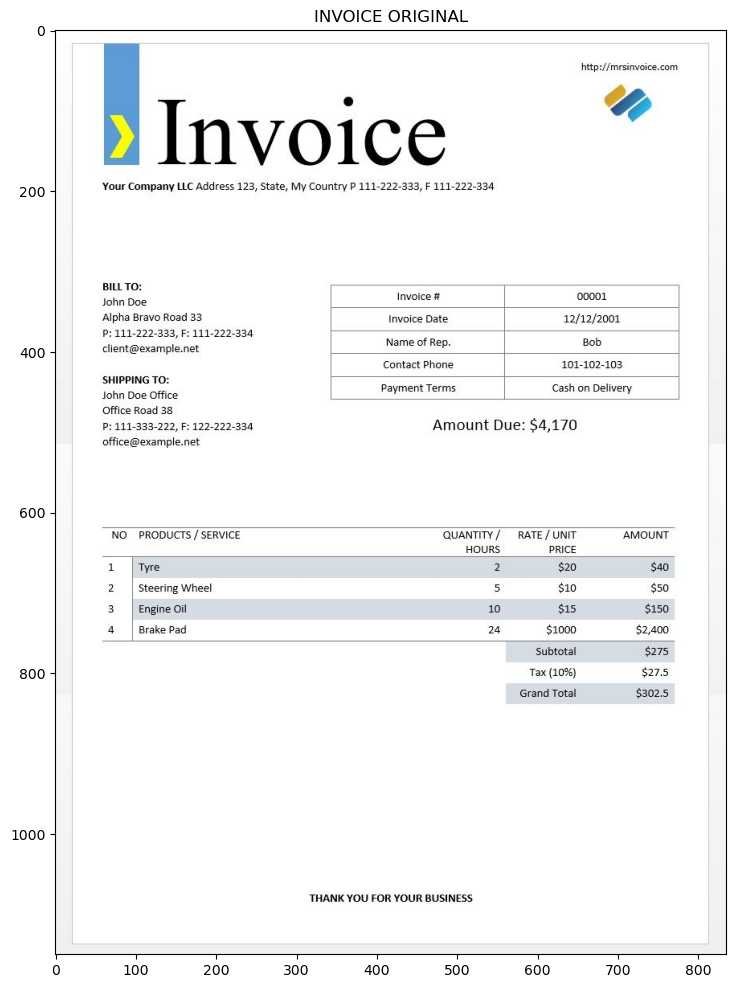

In [9]:
# Plot original image
image = cv2.imread(IMG_DIR + 'invoice.jpg')
b,g,r = cv2.split(image)
rgb_img = cv2.merge([r,g,b])

plt.figure(figsize=(16,12))
plt.imshow(rgb_img)
plt.title('INVOICE ORIGINAL')
plt.show()

In [10]:
# Plot character boxes on image using pytesseract.image_to_boxes() function
image = cv2.imread(IMG_DIR + 'invoice.jpg')
h, w, c = image.shape
boxes = pytesseract.image_to_boxes(image) 
for b in boxes.splitlines():
    b = b.split(' ')
    image = cv2.rectangle(image, (int(b[1]), h - int(b[2])), (int(b[3]), h - int(b[4])), (0, 255, 0), 2)

b,g,r = cv2.split(image)
rgb_img = cv2.merge([r,g,b])

plt.figure(figsize=(16,12))
plt.imshow(rgb_img)
plt.title('INVOICE WITH CHARACTER LEVEL BOXES')
plt.show()

FileNotFoundError: [Errno 2] No such file or directory: 'C:\\Users\\Gauri\\AppData\\Local\\Temp\\tess_z907qkuq.box'

DATA KEYS: 
 dict_keys(['level', 'page_num', 'block_num', 'par_num', 'line_num', 'word_num', 'left', 'top', 'width', 'height', 'conf', 'text'])


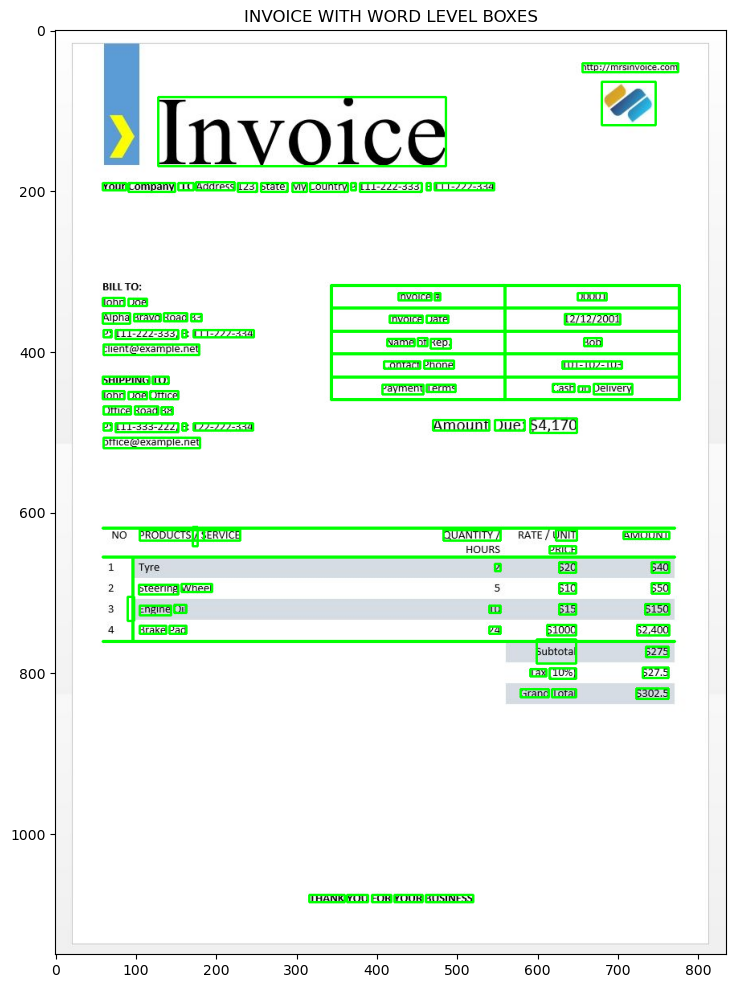

In [4]:
# Plot word boxes on image using pytesseract.image_to_data() function
image = cv2.imread(IMG_DIR + 'invoice.jpg')
d = pytesseract.image_to_data(image, output_type=Output.DICT)
print('DATA KEYS: \n', d.keys())

n_boxes = len(d['text'])
for i in range(n_boxes):
    # condition to only pick boxes with a confidence > 60%
    if int(d['conf'][i]) > 60:
        (x, y, w, h) = (d['left'][i], d['top'][i], d['width'][i], d['height'][i])
        image = cv2.rectangle(image, (x, y), (x + w, y + h), (0, 255, 0), 2)

b,g,r = cv2.split(image)
rgb_img = cv2.merge([r,g,b])
plt.figure(figsize=(16,12))
plt.imshow(rgb_img)
plt.title('INVOICE WITH WORD LEVEL BOXES')
plt.show()

# Working with Multiple Languages

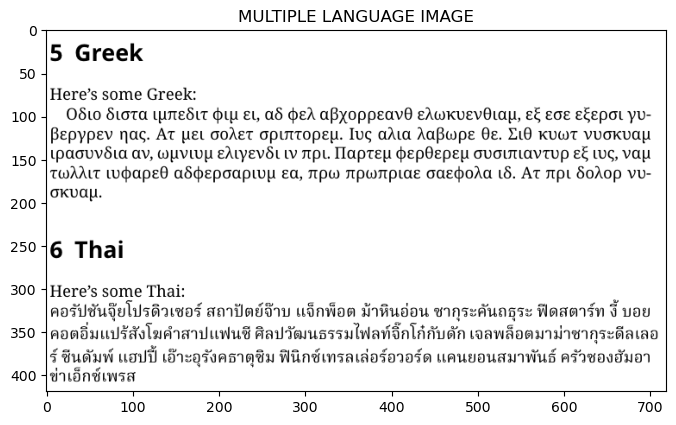

In [5]:
# Plot original image
image = cv2.imread(IMG_DIR + 'multi.png')
b,g,r = cv2.split(image)
rgb_img = cv2.merge([r,g,b])
plt.figure(figsize=(8,16))
plt.imshow(rgb_img, cmap = 'gray')
plt.title('MULTIPLE LANGUAGE IMAGE')
plt.show()

In [6]:
# Output with only english language specified
custom_config = r'-l eng --oem 3 --psm 6'
print(pytesseract.image_to_string(image, config=custom_config))

5 Greek
Here’s some Greek:

OSto Stota tuMEesit Huy Et, aS ea aByoppeave edAwkvevOuay, e ece efepot yu-
Bepypev nas. AT Wel GoAET opiTtopen. Tug aAta AaBwpe Ve. LO KUWT VUoKLaL
(paovvéia av, WUVLUU eAtyevil WV mpL TMaptep depSepep GvaUTLAVTUp e€€ LUG, Va
TWAALT LUdaped ASoepoapluy Ea, TOW MpwTplae Gaedoda 16. AT mpt SoAop vv-
oxvau.

6 Thai

Here’s some Thai: .
aossugulusdawos amiadiw usntion sinfiudou winszduagss Haaonsn 3 vos
Aonduudsaladrawunus AavTausssulwavanlAdudn wandoamnsirwinsedataa
$ Suduvi woud ovasaas osu Windinsadoso10so unusouanrwus aswouduer
didadinsa



In [7]:
# Output with all languages specified
custom_config = r'-l grc+tha+eng --oem 3 --psm 6'
print(pytesseract.image_to_string(image, config=custom_config))

5 Greek
Here’s some Greek:

OSto διστα ιμπεδιτ แน ει, ๕ 6 ea αβχορρεανθ ελωκυενθιαμ, εξ εσε εξερσι yu-
Bepypev ท ุ ต 6. AT μει σολετ σριπτορεμ. ἴυς αλια λαβωρε θε. Σιθ κυωτ νυσκυαμ
τρασυνδια αν, เง น บ ง เบ น ελιγενδι τιν πρι. Παρτεμ φερθερεμ συσιπιαντὺυρ εξ LUG, ง ส น
τωλλιτ เง ๑ ๕ ๓๕80 ๕6 ๑ อ 06 ส 0 เง น Ea, TOW πρωπριαε σαεφολα เอ . AT πρι δολορ ห บ -
σκυαμ.

6 Thai

Here’s some Thai: ν᾿

ค อ ร ั ป ซั น จ ุ ้ ย โป ร ด ิ ว เซ อ ร ์ ส ถา ป ั ต ย ์ จ ๊ า บ แจ ็ ก พ ็ อ ต ม ้ า ห ิ น อ ่ อ น ซา ก ุ ร ะ ค ั น ถ ธ ุ ร ะ ฟิ ด ส ต า ร ์ ท ง ี ้ บ อ ย
ค อ ต อ ื ่ ม แป ร ั ส ั ง โฆ ค ํ า ส า ป แฟ น ซี ศิ ล ป ว ั ฒ น ธร ร ม ไฟ ล ท ์ จ ิ ๊ ก โก ๋ ก ั บ ต ั ก เจ ล พ ล ็ อ ต ม า ม ่ า ซา ก ุ ร ะ ด ี ล เล อ
ร ์ ซี น ด ั ม พ ์ แฮ ป ป ี ้ เอ ๊ ้ า ะ อ ุ ร ั ง ค ธา ต ุ ซิ ม ฟิ น ิ ก ซ์ เท ร ล เล ่ อ ร ์ อ ว อ ร ์ ด แค น ย อ น ส ม า พ ั น ธ์ ค ร ั ว ซอ ง ฮั ม อ า
ข่ า เอ ็ ก ซ์ เพ ร ส



In [8]:
# Output with all languages specified
custom_config = r'-l grc+tha+eng+jpn --oem 3 --psm 6'
print(pytesseract.image_to_string(image, config=custom_config))

5 Greek
Here’s some Greek:

OSto διστα ιμπεδιτ แน ει, ๕ 6 ea αβχορρεανθ ελωκυενθιαμ, εξ εσε EEEDOL YU-
Bepypev ท ุ ต 6. AT μει σολετ σριπτορεμ. ἴυς αλια λαβωρε θε. Σιθ Ku て νυσκυαμ
τρασυνδια αν, เง น บ ง เบ น ελιγενδι τιν πρι. Παρτεμ φερθερεμ συσιπιαντὺυρ εξ LUG, ง ส น
τωλλιτ เง ๑ ๕ ๓๕80 ๕6 ๑ อ 06 ส 0 เง น Ea, TOW πρωπριαε σαεφολα เอ . AT πρι δολορ ห บ -
σκυαμ.

6 Thai

Here’s some Thai: 。

ค อ ร ั ป ซั น จ ุ ้ ย โป ร ด ิ ว เซ อ ร ์ ส ถา ป ั ต ย ์ จ ๊ า บ แจ ็ ก พ ็ อ ต ม ้ า ห ิ น อ ่ อ น ซา ก ุ ร ะ ค ั น ถ ธ ุ ร ะ ฟิ ด ส ต า ร ์ ท す บ อ ย
ค อ ต อ ื ่ ม แป ร ั ส ั ง โฆ ค ํ า ส า ป แฟ น ซี ศิ ล ป ว ั ฒ น ธร ร ม ไฟ ล ท ์ จ ิ ๊ ก โก ๋ ก ั บ ต ั ก เจ ล พ ล ็ อ ต ม า ม ่ า ซา ก ุ ร ะ ด ี ล เล อ
ร ์ ซี น ด ั ม พ ์ แฮ ป ป ี ้ เอ ๊ ้ า ะ อ ุ ร ั ง ค ธา ต ุ ซิ ม ฟิ น ิ ก ซ์ เท ร ล เล ่ อ ร ์ อ ว อ ร ์ ด แค น ย อ น ส ม า พ ั น ธ์ ค ร ั ว ซอ ง ฮั ม อ า
ข่ า เอ ็ ก ซ์ เพ ร ส

